## data visulization
In this hands-on micro-course, you'll learn how to take your data visualizations to the next level with seaborn, a powerful but easy-to-use data visualization tool. 

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
fifa_data = pd.read_csv("fifa.csv", index_col="Date", parse_dates=True)

parse_dates=True - This tells the notebook to understand the each row label as a date (as opposed to a number or other text with a different meaning).
index_col="Date" - When we load the dataset, we want each entry in the first column to denote a different row. To do this, we set the value of index_col to the name of the first column.

Now, we'll take a quick look at the dataset in fifa_data, to make sure that it loaded properly.

We print the first five rows of the dataset by writing one line of code as follows:

    begin with the variable containing the dataset (in this case, fifa_data), and then
    follow it with .head().

You can see this in the line of code below.

In [3]:
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


## Plot the data
For a sneak peak at what you'll learn, check out the code below that generates a line chart.

<Axes: xlabel='Date'>

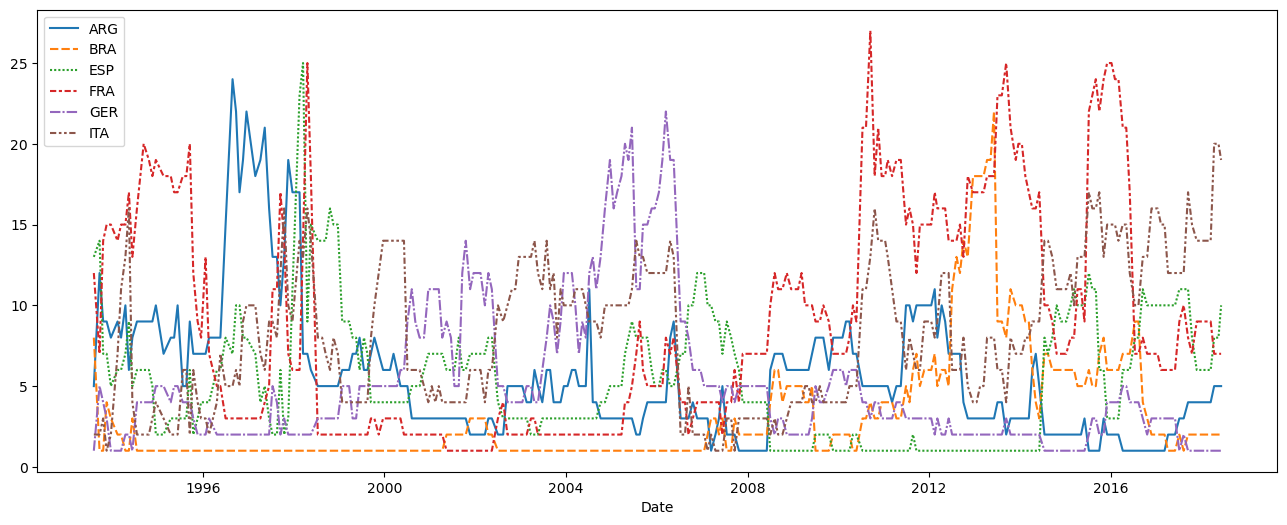

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=fifa_data)

## Line charts 

In [5]:
spotify_data = pd.read_csv("spotify.csv", index_col="Date", parse_dates=True)

In [9]:
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


Empty entries will appear as NaN, which is short for "Not a Number".


<Axes: xlabel='Date'>

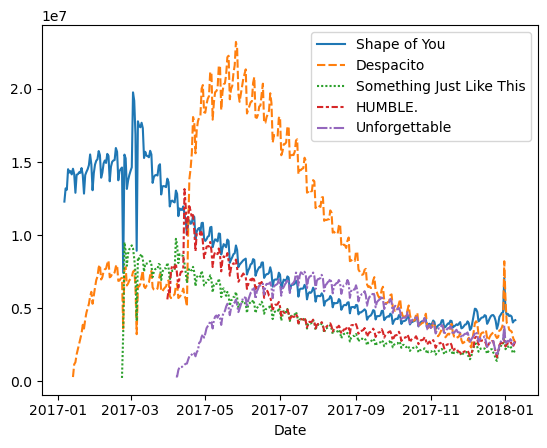

In [7]:
sns.lineplot(data=spotify_data)

As you can see above, the line of code is relatively short and has two main components:<br>
1)sns.lineplot tells the notebook that we want to create a line chart.<br>
2)data=spotify_data selects the data that will be used to create the chart.<br><br>
Sometimes there are additional details we'd like to modify, like the size of the figure and the title of the chart. Each of these options can easily be set with a single line of code.


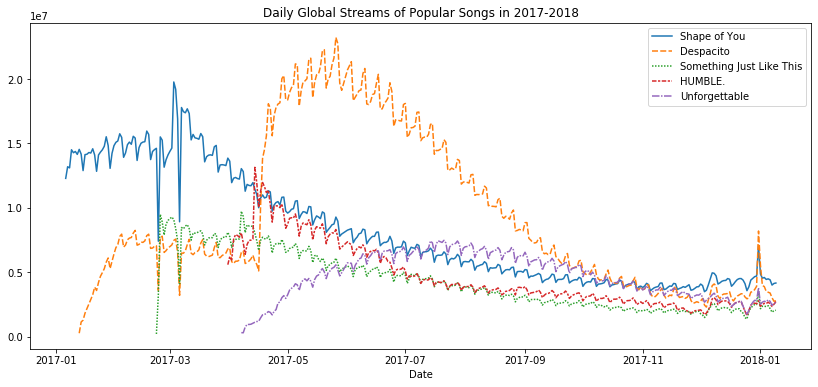

In [22]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of each song 
sns.lineplot(data=spotify_data)

The first line of code sets the size of the figure to 14 inches (in width) by 6 inches (in height). To set the size of any figure, you need only copy the same line of code as it appears. Then, if you'd like to use a custom size, change the provided values of 14 and 6 to the desired width and height.

The second line of code sets the title of the figure. Note that the title must always be enclosed in quotation marks ("...")!

## Plot a subset of the data
So far, you've learned how to plot a line for every column in the dataset. In this section, you'll learn how to plot a subset of the columns.

We'll begin by printing the names of all columns. This is done with one line of code and can be adapted for any dataset by just swapping out the name of the dataset (in this case, spotify_data).

In [24]:
list(spotify_data.columns)

['Shape of You',
 'Despacito',
 'Something Just Like This',
 'HUMBLE.',
 'Unforgettable']



In the next code cell, we plot the lines corresponding to the first two columns in the dataset.


Text(0.5, 0, 'Date')

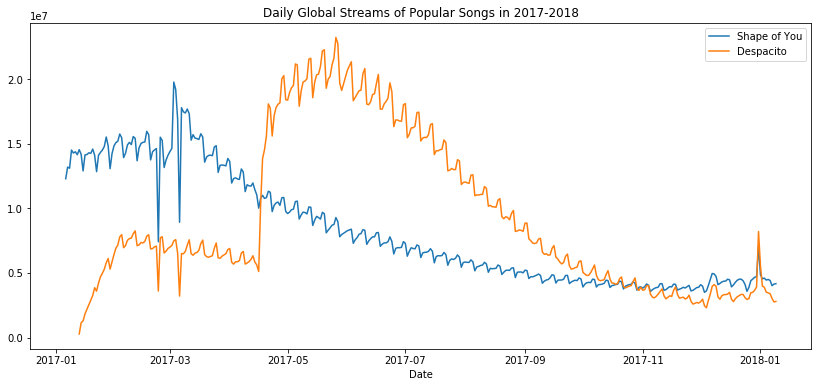

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date")

Instead of setting data=spotify_data, we set data=spotify_data['Shape of You']. In general, to plot only a single column, we use this format with putting the name of the column in single quotes and enclosing it in square brackets. (To make sure that you correctly specify the name of the column, you can print the list of all column names using the command you learned above.)<br>
We also add label="Shape of You" to make the line appear in the legend and set its corresponding label.

## Bar charts and Heatmaps


In [29]:
flight_data = pd.read_csv("flight_delays.csv", index_col="Month")

In [32]:
flight_data.head()

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Each entry shows the average arrival delay (in minutes) for a different airline and month (all in year 2015). Negative entries denote flights that (on average) tended to arrive early. For instance, the average American Airlines flight (airline code: AA) in January arrived roughly 7 minutes late, and the average Alaska Airlines flight (airline code: AS) in April arrived roughly 3 minutes early.<br>
<br>
create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

Text(0, 0.5, 'Arrival delay (in minutes)')

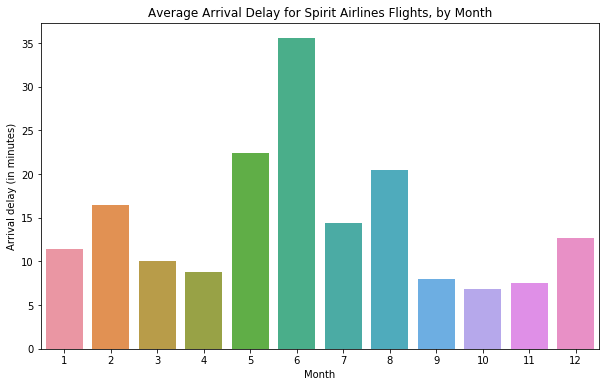

In [33]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

sns.barplot - This tells the notebook that we want to create a bar chart.<br>
Remember that sns refers to the seaborn package, and all of the commands that you use to create charts in this course will start with this prefix.<br>
1. `x=flight_data.index` - This determines what to use on the horizontal axis. In this case, we have selected the column that indexes the rows (in this case,     the column containing the months).<br>
2. `y=flight_data['NK']` - This sets the column in the data that will be used to determine the height of each bar. In this case, we select the 'NK' column.


## Heatmap
In the code cell below, we create a heatmap to quickly visualize patterns in flight_data. Each cell is color-coded according to its corresponding value.

Text(0.5, 42.0, 'Airline')

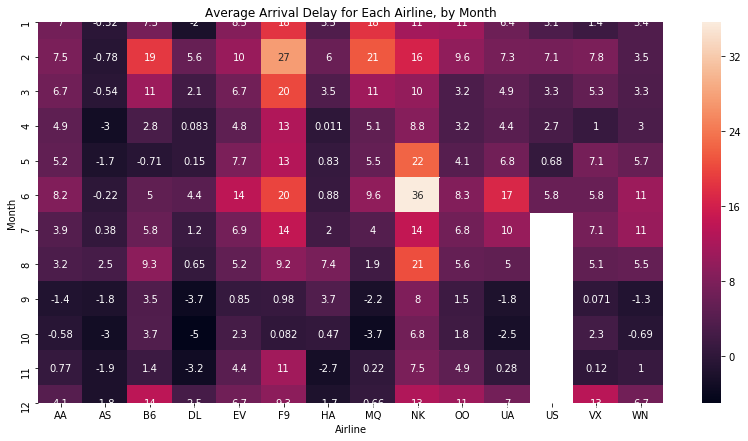

In [77]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

`sns.heatmap` - This tells the notebook that we want to create a heatmap.<br>
`data=flight_data` - This tells the notebook to use all of the entries in flight_data to create the heatmap.<br>
`annot=True` - This ensures that the values for each cell appear on the chart. (Leaving this out removes the numbers from each of the cells!)<br>
#### What patterns can you detect in the table? For instance, if you look closely, the months toward the end of the year (especially months 9-11) appear relatively dark for all airlines. This suggests that airlines are better (on average) at keeping schedule during these months!

## Scatter plots 

In [48]:
insurance_data = pd.read_csv("insurance.csv")

In [49]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To create a simple scatter plot, we use the sns.scatterplot command and specify the values for:

1. the horizontal x-axis (x=insurance_data['bmi']), and
2. the vertical y-axis (y=insurance_data['charges']).


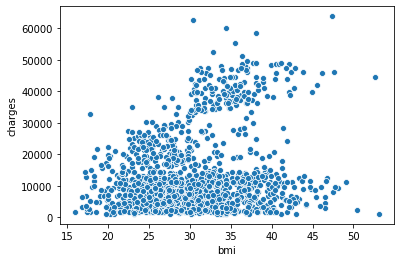

In [51]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])



The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)<br>

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.


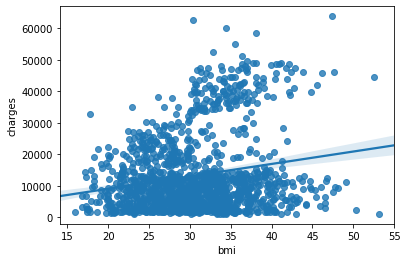

In [52]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

## Color-coded scatter plots
We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

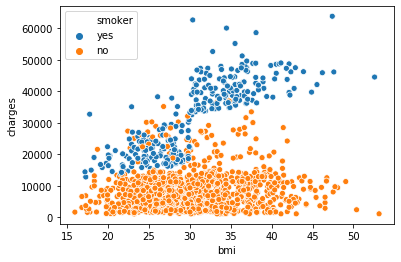

In [56]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)


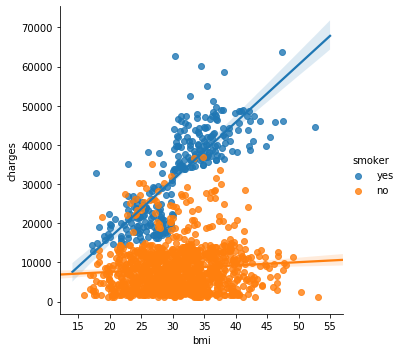

In [57]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the `sns.swarmplot` command.

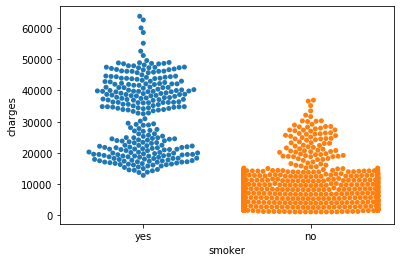

In [58]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Among other things, this plot shows us that:
1. on average, non-smokers are charged less than smokers, and
2. the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

## Histograms

In [59]:
iris_data = pd.read_csv("iris.csv", index_col="Id")

In [60]:
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the sns.distplot command.

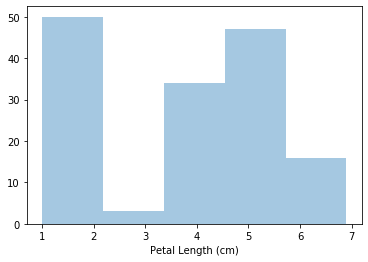

In [63]:
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)

We customize the behavior of the command with two additional pieces of information:
1. a= chooses the column we'd like to plot (in this case, we chose 'Petal Length (cm)').
2. kde=False is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.


## Density plots
The next type of plot is a kernel density estimate (KDE) plot. In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.

To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve (and data= has identical functionality as when we made the histogram above).

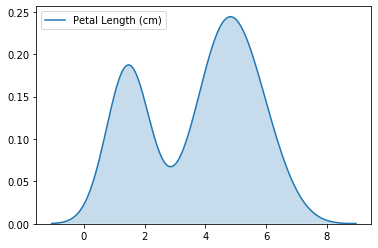

In [65]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

## Color-coded plots¶
we'll create plots to understand differences between the species. To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.


In [66]:
# Paths of the files to read
iris_set_filepath = "iris_setosa.csv"
iris_ver_filepath = "iris_versicolor.csv"
iris_vir_filepath = "iris_virginica.csv"

# Read the files into variables 
iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

# Print the first 5 rows of the Iris versicolor data
iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In the code cell below, we create a different histogram for each species by using the sns.distplot command (as above) three times. We use label= to set how each histogram will appear in the legend.

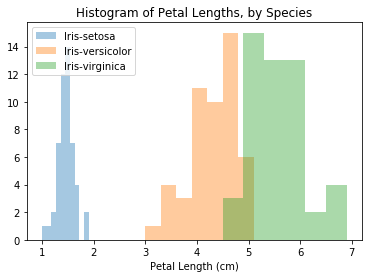

In [69]:
# Histograms for each species
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

We can also create a KDE plot for each species by using sns.kdeplot (as above). Again, label= is used to set the values in the legend.

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

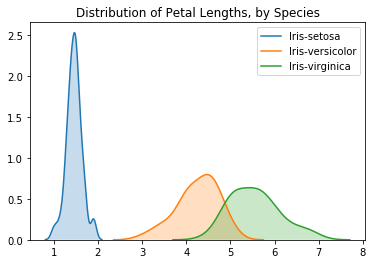

In [70]:
# KDE plots for each species
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

## Summary

![asd](Capture.png)